### Package loading, environment variables, generic functions and data loading

In [1]:
## Load packages

import matplotlib.pyplot as plt
import numpy as np
import os
from six.moves import cPickle as pickle
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
import string
import time
import tensorflow as tf

In [2]:
## Define environment variables

HOMEDIR = os.environ["HOME"]

BASEDIR = os.path.join(HOMEDIR, "workspace", "jupyterlab", "TensorFlowUdacity")

DATADIR = os.path.join(BASEDIR, "data")
SANITIZEDDATADIR = os.path.join(DATADIR, "notmnist", "sanitized")

SANITIZEDDATAFILE = os.path.join(SANITIZEDDATADIR, 'notmnist.pickle')

In [3]:
## Load pickled sanitized train, validation and test datasets

with open(SANITIZEDDATAFILE, 'rb') as f:
    sane_datasets = pickle.load(f)
    train_dataset = sane_datasets['train_dataset']
    train_labels = sane_datasets['train_labels']
    ntrain = sane_datasets['ntrain']
    validation_dataset = sane_datasets['validation_dataset']
    validation_labels = sane_datasets['validation_labels']
    nvalidation = sane_datasets['nvalidation']
    test_dataset = sane_datasets['test_dataset']
    test_labels = sane_datasets['test_labels']
    ntest = sane_datasets['ntest']
    del sane_datasets
    
print('Number of images in train set:', ntrain)
print('Number of images in validation set:', nvalidation)
print('Number of images in test set:', ntrain)

Number of images in train set: 151349
Number of images in validation set: 8882
Number of images in test set: 151349


In [4]:
## Set image properties and number of classes

image_size = 28 # Pixel width and height
npixels = image_size**2 # Total number of pixels in an image

nclasses = 10 # Number of classes (letters)

In [5]:
## Function for reformatting data in format compatible with scikit-learn and TensorFlow

def reformat(dataset, labels, npixels, nclasses):
    formatted_dataset = dataset.reshape(-1, npixels).astype(np.float32)
    formatted_labels = (np.arange(nclasses) == labels[:, None]).astype(np.float32) # Vectorize each label (one-hot encoding)
    return formatted_dataset, formatted_labels

In [6]:
## Reformat data in format compatible with scikit-learn and TensorFlow

train_dataset, onehot_train_labels = reformat(train_dataset, train_labels, npixels, nclasses)
validation_dataset, onehot_validation_labels = reformat(validation_dataset, validation_labels, npixels, nclasses)
test_dataset, onehot_test_labels = reformat(test_dataset, test_labels, npixels, nclasses)

print('Dimension of training set:', train_dataset.shape)
print('Dimension of validation set:', validation_dataset.shape)
print('Dimension of test set:', test_dataset.shape)

print('Dimension of train labels:', onehot_train_labels.shape)
print('Dimension of validation labels:', onehot_validation_labels.shape)
print('Dimension of test labels:', onehot_test_labels.shape)

Dimension of training set: (151349, 784)
Dimension of validation set: (8882, 784)
Dimension of test set: (9006, 784)
Dimension of train labels: (151349, 10)
Dimension of validation labels: (8882, 10)
Dimension of test labels: (9006, 10)


In [7]:
## Compute absolute frequencies per class in train, validation and test datasets

train_bincount = np.bincount(train_labels)
validation_bincount = np.bincount(validation_labels)
test_bincount = np.bincount(test_labels)

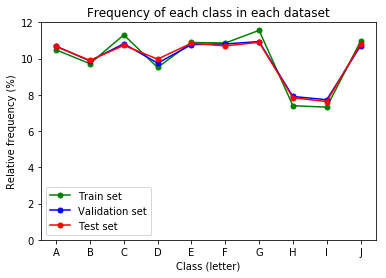

In [8]:
## Plot relative frequency of each class (letter) in each dataset

plt.gca().set_prop_cycle('color', ['green', 'blue', 'red'])

plt.plot(np.arange(nclasses), np.round(100*np.bincount(train_labels)/ntrain, 2), marker='o', markersize=5)
plt.plot(np.arange(nclasses), np.round(100*np.bincount(validation_labels)/nvalidation, 2), marker='o', markersize=5)
plt.plot(np.arange(nclasses), np.round(100*np.bincount(test_labels)/ntest, 2), marker='o', markersize=5)

plt.ylim([0, 12])

plt.xlabel('Class (letter)')
plt.ylabel('Relative frequency (%)')
plt.title('Frequency of each class in each dataset')

plt.xticks(np.arange(nclasses), string.ascii_uppercase[:nclasses])

plt.legend(('Train set', 'Validation set', 'Test set'), loc='lower left')

plt.show()

In [9]:
## Function for counting elements per class

def element_count_per_class(labels, nclasses):
    counts = np.zeros(nclasses, dtype=np.int64)
    for label in np.nditer(labels):
        counts[int(label)] += 1
                
    return counts

In [10]:
## Function for counting correct predictions per class

def prediction_count_per_class(labels, predictions, nclasses):
    counts = np.zeros(nclasses, dtype=np.int64)
    for label, prediction in np.nditer([labels, predictions]):
        if label == prediction:
            counts[int(label)] += 1
                
    return counts

In [11]:
## Function for plotting prediction accuracy per class across different data sets

def plot_prediction_accuracy_per_class(scores, nclasses, color, legend, xticks, marker='o', markersize=5, show=True):
    plt.gca().set_prop_cycle('color', color)

    for score in scores:
        plt.plot(np.arange(nclasses), score, marker=marker, markersize=markersize)

    plt.ylim((0, 100))

    plt.xlabel('Class')
    plt.ylabel('Prediction accuracy (%)')
    plt.title('Prediction accuracy per class')

    plt.xticks(np.arange(nclasses), xticks)

    plt.legend(legend, loc='lower left')

    if show:
        plt.show()

### Logistic regression using scikit-learn

In [12]:
## Fit logistic regression with L-BFGS optimizer using scikit-learn

logreg = LogisticRegression(C=1e5, multi_class='multinomial', solver='lbfgs')

start_time = time.process_time()
logreg.fit(train_dataset, train_labels)
end_time = time.process_time()
sklearn_logreg_lbfgs_time = end_time-start_time

sklearn_logreg_lbfgs_score = logreg.score(test_dataset, test_labels)

print('Logistic regression with L-BFGS optimizer using scikit-learn')
print('Time ellapsed: %f seconds' % sklearn_logreg_lbfgs_time)
print('Prediction accuracy: %.3f%%' % round(100*sklearn_logreg_lbfgs_score))

Logistic regression with L-BFGS optimizer using scikit-learn
Time ellapsed: 62.944475 seconds
Prediction accuracy: 89.000%


In [13]:
## Count correct predictions per class in train set for logistic regression with L-BGFS optimizer in scikit-learn

train_sklearn_logreg_lbfgs_pred_count_per_class = prediction_count_per_class(
    train_labels, logreg.predict(train_dataset), nclasses
)

train_sklearn_logreg_lbfgs_pred_count_per_class

array([12911, 11434, 14709, 11679, 12827, 14155, 14300,  8511,  7229,
       13929])

In [14]:
## Compute prediction accuracy per class in train set for logistic regression with L-BGFS optimizer in scikit-learn

train_sklearn_logreg_lbfgs_pred_score_per_class = np.round(
    100*train_sklearn_logreg_lbfgs_pred_count_per_class/train_bincount, 2
)

train_sklearn_logreg_lbfgs_pred_score_per_class

array([81.43, 77.69, 85.9 , 81.18, 77.83, 86.13, 81.7 , 75.95, 65.28,
       84.08])

In [15]:
## Count correct predictions per class in test set for logistic regression with L-BGFS optimizer in scikit-learn

test_sklearn_logreg_lbfgs_pred_count_per_class = prediction_count_per_class(
    test_labels, logreg.predict(test_dataset), nclasses
)

test_sklearn_logreg_lbfgs_pred_count_per_class

array([854, 772, 905, 824, 847, 896, 853, 608, 526, 894])

In [16]:
## Compute prediction accuracy per class in train set for logistic regression with L-BGFS optimizer in scikit-learn

test_sklearn_logreg_lbfgs_pred_score_per_class = np.round(
    100*test_sklearn_logreg_lbfgs_pred_count_per_class/test_bincount, 2
)

test_sklearn_logreg_lbfgs_pred_score_per_class

array([88.87, 86.55, 93.69, 91.76, 86.69, 92.95, 86.86, 86.12, 76.56,
       91.88])

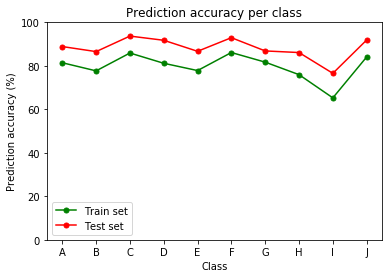

In [17]:
## Plot prediction accuracy per class in train and test set for logistic regression with L-BGFS optimizer in scikit-learn

plot_prediction_accuracy_per_class(
    [train_sklearn_logreg_lbfgs_pred_score_per_class, test_sklearn_logreg_lbfgs_pred_score_per_class], nclasses, 
    ('green', 'red'), ('Train set', 'Test set'), string.ascii_uppercase[:nclasses]
)

In [18]:
## Fit logistic regression with SGD optimizer using scikit-learn

logreg = SGDClassifier(loss='log', penalty='l2', max_iter=10)
# logreg = SGDClassifier(loss='log', penalty='l2', tol=1e5)

start_time = time.process_time()
logreg.fit(train_dataset, train_labels)
end_time = time.process_time()
sklearn_logreg_sgd_time = end_time-start_time

sklearn_logreg_sgd_score = logreg.score(test_dataset, test_labels)

print('Logistic regression with SGD optimizer using scikit-learn')
print('Time ellapsed: %f seconds' % sklearn_logreg_sgd_time)
print('Prediction accuracy: %.3f%%' % round(100*sklearn_logreg_sgd_score))

Logistic regression with SGD optimizer using scikit-learn
Time ellapsed: 62.892016 seconds
Prediction accuracy: 88.000%


In [19]:
## Count correct predictions per class in train set for logistic regression with SGD optimizer in scikit-learn

train_sklearn_logreg_sgd_pred_count_per_class = prediction_count_per_class(
    train_labels, logreg.predict(train_dataset), nclasses
)

train_sklearn_logreg_sgd_pred_count_per_class

array([12724, 10883, 14402, 11726, 12748, 13921, 13981,  8106,  6688,
       14010])

In [20]:
## Compute prediction accuracy per class in train set for logistic regression with SGD optimizer in scikit-learn

train_sklearn_logreg_sgd_pred_score_per_class = np.round(
    100*train_sklearn_logreg_sgd_pred_count_per_class/train_bincount, 2
)

train_sklearn_logreg_sgd_pred_score_per_class

array([80.25, 73.95, 84.1 , 81.5 , 77.35, 84.7 , 79.88, 72.34, 60.39,
       84.57])

In [21]:
## Count correct predictions per class in test set for logistic regression with SGD optimizer in scikit-learn

test_sklearn_logreg_sgd_pred_count_per_class = prediction_count_per_class(
    test_labels, logreg.predict(test_dataset), nclasses
)

test_sklearn_logreg_sgd_pred_count_per_class

array([845, 744, 896, 831, 836, 891, 852, 586, 503, 897])

In [22]:
## Compute prediction accuracy per class in train set for logistic regression with SGD optimizer in scikit-learn

test_sklearn_logreg_sgd_pred_score_per_class = np.round(100*test_sklearn_logreg_sgd_pred_count_per_class/test_bincount, 2)

test_sklearn_logreg_sgd_pred_score_per_class

array([87.93, 83.41, 92.75, 92.54, 85.57, 92.43, 86.76, 83.  , 73.22,
       92.19])

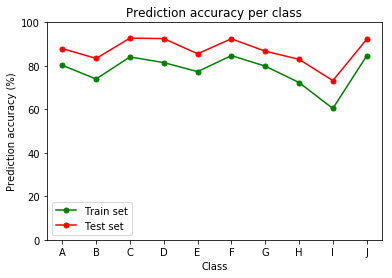

In [23]:
## Plot prediction accuracy per class in train and test set for logistic regression with SGD optimizer in scikit-learn

plot_prediction_accuracy_per_class(
    [train_sklearn_logreg_sgd_pred_score_per_class, test_sklearn_logreg_sgd_pred_score_per_class], nclasses, 
    ('green', 'red'), ('Train set', 'Test set'), string.ascii_uppercase[:nclasses]
)

### Generic functions for graph building and for session running in tensorflow

In [24]:
## Function for building a logistic regression model in tensorflow in the form of a graph

def build_logreg_model(nw, nclasses, initw, initb, board=()):
    graph = tf.get_default_graph()
    
    with graph.as_default():
        with tf.name_scope('data'):
            X = tf.placeholder(tf.float32, [None, nw]) # mnist data image of shape 28*28=784
            y = tf.placeholder(tf.float32, [None, nclasses]) # 0-9 digits recognition => 10 classes
            
        with tf.name_scope('parameters'):
            W = tf.Variable(initw)
            b = tf.Variable(initb)

        with tf.name_scope('outlayer'):
            outlayer = tf.matmul(X, W)+b

        if 'histogram' in board:
            with tf.name_scope('summaries') as summaries_scope:
                tf.summary.histogram('weights', W)
                tf.summary.histogram('bias', b)
            
    build = {'graph': graph, 'X': X, 'y': y, 'outlayer': outlayer}
    
    if 'histogram' in board:
        build['summaries_scope'] = summaries_scope
    
    return build

In [25]:
## Function for completing build of a graph in tensorflow given inputted model ('build' input argument)

def build_classifier_graph(build, optimizer, activation='softmax', monitor=(), board=()):
    monitor_predictions = ('accuracy', 'accuracy_per_class')
    has_monitor_predictions = any(p in monitor_predictions for p in monitor)
    
    with build['graph'].as_default():        
        with tf.name_scope('loss'):            
            if activation == 'softmax_with_logits':
                loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=build['y'], logits=build['outlayer']))
            elif activation == 'sigmoid_with_logits':
                loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits_v2(labels=build['y'], logits=build['outlayer']))
            elif activation == 'mse':
                loss = tf.losses.mean_squared_error(labels=build['y'], predictions=build['outlayer'])
            else:
                raise ValueError('Wrong value passed to activation input argument')
                
        with tf.name_scope('optimization'):
            optimization = optimizer.minimize(loss)

        if (has_monitor_predictions or ('accuracy' in board)):
            with tf.name_scope('predictions'):
                yargmax = tf.argmax(build['y'], 1)
                predictions = tf.argmax(tf.nn.softmax(build['outlayer']), 1)
                
                if ('accuracy' in board):
                    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, yargmax), tf.float32))

        if board:
            summaries_scope = build['summaries_scope'] if ('summaries_scope' in build) else tf.name_scope('summaries')
            
            with tf.name_scope(summaries_scope):
                if 'loss' in board:
                    tf.summary.scalar('loss', loss)
                if 'accuracy' in board:
                    tf.summary.scalar('accuracy', accuracy)

                summaries = tf.summary.merge_all()

    build['loss'] = loss
    build['optimization'] = optimization
    
    if has_monitor_predictions:
        build['yargmax'] = yargmax
        build['predictions'] = predictions

    if board:
        build['summaries'] = summaries

In [26]:
## Function for running a session to train a model in tensorflow

def train_classifier(
    session, build, feed, ndata, batchsize, nclasses, nepochs,
    saver=None, restore=False, save=False, monitor=(), board=(), multibatchsize=100, permute=True,
    sessiondir=os.path.join('log', 'session'), boarddir=os.path.join('log', 'board'), verbose=False
):
    if restore:
        saver.restore(session, sessiondir)
    
    nbatches = ndata//batchsize
    nsteps = nepochs*nbatches
    epochsize = nbatches*batchsize

    monitor_predictions = ('accuracy', 'accuracy_per_class')
    has_monitor_predictions = any(p in monitor_predictions for p in monitor)
    
    if multibatchsize is None:
        multibatchsize = batchsize
        m = 1
    else:
        if (multibatchsize % batchsize) != 0:
            raise ValueError('multibatchsize must be a multiple of batchsize')
        else:
            m = multibatchsize//batchsize
      
    nmultibatches = (nepochs*epochsize)//multibatchsize

    fetches = []
    
    if monitor:
        if 'loss' in monitor:
            fetches.append(build['loss'])
            loss_within_multipbatch = np.empty((m,), dtype=np.float32)
            loss = np.empty((nmultibatches,), dtype=np.float32)
        
        if has_monitor_predictions:
            fetches.append(build['yargmax'])
            fetches.append(build['predictions'])
            
            yargmax = np.empty((multibatchsize,), dtype=np.float32)
            predictions = np.empty((multibatchsize,), dtype=np.float32)
            
            if 'accuracy' in monitor:
                accuracy = np.empty((nmultibatches,), dtype=np.float32)
            if 'accuracy_per_class' in monitor:
                nlabels_per_class = np.empty((nmultibatches, nclasses), dtype=np.int64)
                npredictions_per_class = np.empty((nmultibatches, nclasses), dtype=np.int64)
                accuracy_per_class = np.empty((nmultibatches, nclasses), dtype=np.float32)

    if board:
        fetches.append(build['summaries'])
        writer = tf.summary.FileWriter(boarddir, build['graph'])

    fetches.append(build['optimization'])
    
    fetches.reverse()
    
    if verbose:
        msg_template = "Multibach {:"+str(len(str(nmultibatches)))+"} of {:"+str(len(str(nmultibatches)))
        msg_template += "} with ending batch {:"+str(len(str(nbatches)))+"} of {:"+str(len(str(nbatches)))
        msg_template += "} in epoch {:"+str(len(str(nepochs)))+"} of {:"+str(len(str(nepochs)))+"}"
        
        if monitor:
            if 'loss' in monitor:
                msg_template += "\n  Loss: {:.3E}"
                
            if has_monitor_predictions:
                if 'accuracy' in monitor:
                    msg_template += "\n  Accuracy: {:.3f}"
                if 'accuracy_per_class' in monitor:
                    msg_template += "\n  Accuracy per class: "+", ".join(["{:.3f}" for _ in range(nclasses)])

    step = 0
    if monitor or verbose:
        i = 0 # i refers to the i-th multibach for storing monitored variables
        if monitor:
            j = 0 # j refers to the j-th batch within a multibach

    for epoch in range(nepochs):
        if permute:
            permutation = np.random.permutation(ndata)
            
        for batch in range(nbatches):
            batch_start = batch*batchsize
            batch_end = batch_start+batchsize

            if permute:
                batch_feed = {
                    build['X']: feed[build['X']][permutation[batch_start:batch_end], :],
                    build['y']: feed[build['y']][permutation[batch_start:batch_end]]
                }
            else:
                batch_feed = {
                    build['X']: feed[build['X']][batch_start:batch_end, :],
                    build['y']: feed[build['y']][batch_start:batch_end]
                }
                
            values = list(session.run(fetches=fetches, feed_dict=batch_feed))

            if monitor:
                j_batch_start = j*batchsize
                j_batch_end = j_batch_start+batchsize
                
                if 'loss' in monitor:
                    loss_within_multipbatch[j] = values.pop()
                
                if has_monitor_predictions:
                    yargmax[j_batch_start:j_batch_end] = values.pop()
                    predictions[j_batch_start:j_batch_end] = values.pop()
            
            if monitor or verbose:
                if ((step+1) % m) != 0:
                    if monitor:
                        j += 1
                else:
                    if monitor:
                        if 'loss' in monitor:
                            loss[i] = np.mean(loss_within_multipbatch)
                            
                        if has_monitor_predictions:
                            if 'accuracy' in monitor:
                                accuracy[i] = np.count_nonzero(yargmax == predictions)/multibatchsize
                            if 'accuracy_per_class' in monitor:
                                nlabels_per_class[i, :] = element_count_per_class(yargmax, nclasses)
                                npredictions_per_class[i, :] = prediction_count_per_class(yargmax, predictions, nclasses)
                                accuracy_per_class[i, :] = np.divide(npredictions_per_class[i, :], nlabels_per_class[i, :])
                    
                        j = 0

                    if verbose:
                        msg_args = [i+1, nmultibatches, batch+1, nbatches, epoch+1, nepochs]
                
                        if monitor:
                            if 'loss' in monitor:
                                msg_args.append(loss[i])
                                
                            if has_monitor_predictions:
                                if 'accuracy' in monitor:
                                    msg_args.append(accuracy[i])
                                if 'accuracy_per_class' in monitor:
                                    msg_args.extend(accuracy_per_class[i, :])

                        print(msg_template.format(*msg_args))

                    i += 1

            if board:
                writer.add_summary(values.pop(), step)
                
            step += 1

    output = {}
    
    if monitor:
        if 'loss' in monitor:
            output['loss'] = loss
            
        if has_monitor_predictions:
            if 'accuracy' in monitor:
                output['accuracy'] = accuracy
            if 'accuracy_per_class' in monitor:
                output['nlabels_per_class'] = nlabels_per_class
                output['npredictions_per_class'] = npredictions_per_class
                output['accuracy_per_class'] = accuracy_per_class

    if save:
        saver.save(session, sessiondir)
    
    return output

In [27]:
## Function for running a session to evaluate a model on a test set in tensorflow

def evaluate_classifier(
    session, saver, build, feed, batchsize, nclasses,
    monitor=('accuracy'), sessiondir=os.path.join('log', 'session'), verbose=False
):
    saver.restore(session, sessiondir)
    
    monitor_predictions = ('accuracy', 'accuracy_per_class')
    has_monitor_predictions = any(p in monitor_predictions for p in monitor)
    
    fetches = []

    if monitor:
        if 'loss' in monitor:
            fetches.append(build['loss'])
            
        if has_monitor_predictions:
            fetches.append(build['yargmax'])
            fetches.append(build['predictions'])

    fetches.append(build['optimization'])
    
    fetches.reverse()

    values = list(session.run(fetches=fetches, feed_dict=feed))
                        
    if monitor:
        if 'loss' in monitor:
            loss = values.pop()
            
        if has_monitor_predictions:
            yargmax = values.pop()
            predictions = values.pop()

            if 'accuracy' in monitor:
                accuracy = np.count_nonzero(yargmax == predictions)/batchsize
            if 'accuracy_per_class' in monitor:
                nlabels_per_class = element_count_per_class(yargmax, nclasses)
                npredictions_per_class = prediction_count_per_class(yargmax, predictions, nclasses)
                accuracy_per_class = np.divide(npredictions_per_class, nlabels_per_class)

    if verbose:
        msg_template = "Evaluating model..."
        msg_args = []
        
        if monitor:
            if 'loss' in monitor:
                msg_template += "\n  Loss: {:.3E}"
                msg_args.append(loss)

            if has_monitor_predictions:
                if 'accuracy' in monitor:
                    msg_template += "\n  Accuracy: {:.3f}"
                    msg_args.append(accuracy)
                if 'accuracy_per_class' in monitor:
                    msg_template += "\n  Accuracy per class: "+", ".join(["{:.3f}" for _ in range(nclasses)])
                    msg_args.extend(accuracy_per_class)
                
        msg_template += "\nModel evaluation completed"

        print(msg_template.format(*msg_args))
     
    output = {}
    
    if monitor:
        if 'loss' in monitor:
            output['loss'] = loss
            
        if has_monitor_predictions:
            if 'accuracy' in monitor:
                output['accuracy'] = accuracy
            if 'accuracy_per_class' in monitor:
                output['nlabels_per_class'] = nlabels_per_class
                output['npredictions_per_class'] = npredictions_per_class
                output['accuracy_per_class'] = accuracy_per_class

    return output

In [28]:
## Function for plotting loss returned as output['loss'] by train()

def plot_loss(loss, marker=None, markersize=5, color='C0', show=True):    
    plt.plot(np.arange(loss.size)+1, loss, marker=marker, markersize=5, color=color)

    plt.xlabel('Step')
    plt.ylabel('Loss')

    if show:
        plt.show()

In [29]:
## Function for plotting accuracy returned as output['accuracy'] by train()

def plot_accuracy(accuracy, marker=None, markersize=5, color='C0', show=True):    
    plt.plot(np.arange(accuracy.size)+1, accuracy, marker=marker, markersize=5, color=color)

    plt.ylim([0, 1])
    
    plt.xlabel('Step')
    plt.ylabel('Accuracy')

    if show:
        plt.show()

### Logistic regression with gradient descent using tensorflow

Recall that the data have been standardized before feeding them to the model. Data standardization can speed up the convergence of the gradient descent optimizer by orders of magnitude. The batchsize is set to be equal to the size of the train set (by setting `batchsize = train_dataset.shape[0]` below), so the optimizer uses all the data at each iteration, hence the optimization is not stochastic.

Notice below that the batchsize is set to be equal to the size of the train set (`ndata = train_dataset.shape[0]` and `batchsize = ndata`). Since the batchsize concides with an epoch, every iteration uses the whole train set, so the optimizer is not stochastic. 1000 epochs are run (`nepochs=1000`), while results are printed and stored for each multibatch consisting of 10 batches-epochs (`multibatchsize=10*ndata`).

Multibatches are utilized for reducing the amount of monitoring information printed and stored during training. In the example below, results are printed for 100 multibatches, each containing 10 epochs, instead of printing results for all 1000 epochs.

For every multibatch of 10 epochs, the loss, prediction accuracy and prediction accuracy per class are reported. Since the number of samples is not the same for all classes, the accuracy is a weighted average of the per-class accuracies in each multibatch.

In [30]:
## Reset default graph

tf.reset_default_graph()

In [31]:
## Build graph for logistic regression on train set with gradient descent using tensorflow

# Initialize logistic regression parameters
initw = tf.truncated_normal([npixels, nclasses])
initb = tf.zeros([nclasses])

# Specify what will be monitored and what will be stored in tensorboard
monitor = ('loss', 'accuracy', 'accuracy_per_class') # To select a single summary, say 'accuracy', set monitor = ('accuracy',)
board = ('loss', 'accuracy', 'histogram')

# Build graph
build = build_logreg_model(npixels, nclasses, initw, initb, board=board)
build_classifier_graph(build, tf.train.GradientDescentOptimizer(0.1), activation='softmax_with_logits', monitor=monitor, board=board)

To check the graph version, run the command `build['graph'].version`.

In [32]:
## Run session to train logistic regression model with gradient descent in tensorflow

ndata = train_dataset.shape[0]
batchsize = ndata # Batch size is equal to the size of the train set, so non-stochastic gradient descent is run

# Set up dictionary feed
feed = {build['X']: train_dataset[0:ndata, :], build['y']: onehot_train_labels[0:ndata]}

nepochs = 1000 # Go through the training set 1000 times
multibatchsize = 10*ndata # Stored monitored output every 100-th step (summaries per 100 epochs)

# Initialize session
session = tf.Session(graph=build['graph'])

# Initialize saver
saver = tf.train.Saver(max_to_keep=5)

# Train the classifier
with session.as_default():
    # Initialize saver
    saver = tf.train.Saver(max_to_keep=5)
    
    # Initialize variables
    session.run(tf.global_variables_initializer())
    
    start_time = time.process_time()
    train_output = train_classifier(
        session, build, feed, ndata, batchsize, nclasses, nepochs,
        saver=saver, save=True, monitor=monitor, board=board, multibatchsize=multibatchsize,
        permute=False,
        sessiondir=os.path.join('log', 'session', 'logreg_gd'),
        boarddir=os.path.join('log', 'board', 'logreg_gd'),
        verbose=True
    )
    end_time = time.process_time()
    tf_logreg_gd_time = end_time-start_time

print('\nTrain logistic regression model with gradient descent using tensorflow')
print('Time ellapsed: %f seconds' % tf_logreg_gd_time)

Multibach   1 of 100 with ending batch 1 of 1 in epoch   10 of 1000
  Loss: 1.343E+01
  Accuracy: 0.146
  Accuracy per class: 0.380, 0.266, 0.222, 0.078, 0.027, 0.078, 0.045, 0.136, 0.191, 0.060
Multibach   2 of 100 with ending batch 1 of 1 in epoch   20 of 1000
  Loss: 1.031E+01
  Accuracy: 0.204
  Accuracy per class: 0.424, 0.307, 0.312, 0.136, 0.053, 0.198, 0.081, 0.153, 0.244, 0.146
Multibach   3 of 100 with ending batch 1 of 1 in epoch   30 of 1000
  Loss: 8.411E+00
  Accuracy: 0.260
  Accuracy per class: 0.454, 0.342, 0.355, 0.197, 0.095, 0.297, 0.159, 0.170, 0.274, 0.246
Multibach   4 of 100 with ending batch 1 of 1 in epoch   40 of 1000
  Loss: 7.164E+00
  Accuracy: 0.315
  Accuracy per class: 0.481, 0.374, 0.384, 0.259, 0.157, 0.364, 0.248, 0.191, 0.294, 0.354
Multibach   5 of 100 with ending batch 1 of 1 in epoch   50 of 1000
  Loss: 6.327E+00
  Accuracy: 0.363
  Accuracy per class: 0.504, 0.401, 0.414, 0.324, 0.222, 0.413, 0.323, 0.216, 0.314, 0.437
Multibach   6 of 100 with

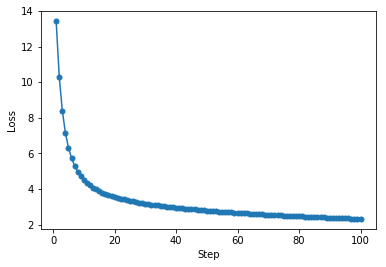

In [33]:
## Plot loss for logistic regression on train set with gradient descent in tensorflow

plot_loss(train_output['loss'], marker='o')

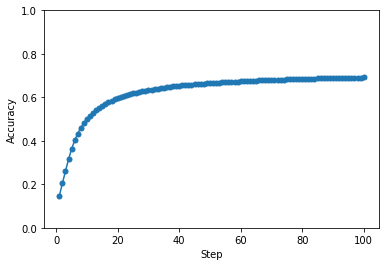

In [34]:
## Plot accuracy for logistic regression on train set with gradient descent in tensorflow

plot_accuracy(train_output['accuracy'], marker='o')

In [35]:
## Count number of samples per class in train set for logistic regression with gradient descent in tensorflow

train_tf_logreg_gd_element_count_per_class = np.sum(train_output['nlabels_per_class'], axis=0)

train_tf_logreg_gd_element_count_per_class

array([15856000, 14717000, 17124000, 14387000, 16481000, 16435000,
       17502000, 11206000, 11074000, 16567000])

In [36]:
## Count correct predictions per class in train set for logistic regression with gradient descent in TensorFlow

train_tf_logreg_gd_pred_count_per_class = np.sum(train_output['npredictions_per_class'], axis=0)

train_tf_logreg_gd_pred_count_per_class

array([10660885,  8884437, 11749624,  9266926,  9462875, 11258015,
       11082324,  5806274,  5194804, 11216242])

In [37]:
## Compute prediction accuracy per class in train set for logistic regression with gradient descent in TensorFlow

train_tf_logreg_gd_pred_score_per_class = np.round(
    100*train_tf_logreg_gd_pred_count_per_class/train_tf_logreg_gd_element_count_per_class, 2
)

train_tf_logreg_gd_pred_score_per_class

array([67.24, 60.37, 68.61, 64.41, 57.42, 68.5 , 63.32, 51.81, 46.91,
       67.7 ])

In [38]:
## Run session to evaluate logistic regression model (trained with gradient descent in tensorflow) on test set

batchsize = test_dataset.shape[0]

# Set up dictionary feed
feed = {build['X']: test_dataset, build['y']: onehot_test_labels}

# Evaluate the model on the test set
test_output = evaluate_classifier(
    session, saver, build, feed, batchsize, nclasses,
    monitor=monitor,
    sessiondir=os.path.join('log', 'session', 'logreg_gd'),
    verbose=True
)

print('\nEvaluate logistic regression model (trained with gradient descent using tensorflow) on test set')

INFO:tensorflow:Restoring parameters from log/session/logreg_gd
Evaluating model...
  Loss: 1.351E+00
  Accuracy: 0.796
  Accuracy per class: 0.813, 0.781, 0.836, 0.847, 0.751, 0.854, 0.796, 0.721, 0.665, 0.837
Model evaluation completed

Evaluate logistic regression model (trained with gradient descent using tensorflow) on test set


In [39]:
## Display number of samples per class in test set for logistic regression with gradient descent in tensorflow

test_tf_logreg_gd_element_count_per_class = test_output['nlabels_per_class']

test_tf_logreg_gd_element_count_per_class

array([961, 892, 966, 898, 977, 964, 982, 706, 687, 973])

In [40]:
## Display correct predictions per class in test set for logistic regression with gradient descent in tensorflow

test_tf_logreg_gd_pred_count_per_class = test_output['npredictions_per_class']

test_tf_logreg_gd_pred_count_per_class

array([781, 697, 808, 761, 734, 823, 782, 509, 457, 814])

In [41]:
## Compute prediction accuracy per class in test set for logistic regression with gradient descent in fensorflow

test_tf_logreg_gd_pred_score_per_class = np.round(100*test_output['accuracy_per_class'], 2)

test_tf_logreg_gd_pred_score_per_class

array([81.27, 78.14, 83.64, 84.74, 75.13, 85.37, 79.63, 72.1 , 66.52,
       83.66])

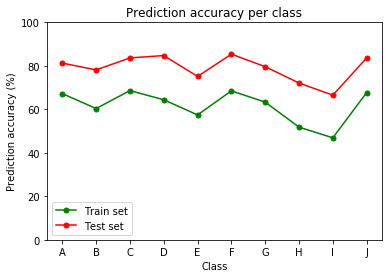

In [42]:
## Plot prediction accuracy per class in train and test set for logistic regression with gradient descent in tensorflow

plot_prediction_accuracy_per_class(
    [train_tf_logreg_gd_pred_score_per_class, test_tf_logreg_gd_pred_score_per_class], nclasses, 
    ('green', 'red'), ('Train set', 'Test set'), string.ascii_uppercase[:nclasses]
)

To use tensorboard, follow two steps:
1. Run tensorboard via the shell command `tensorboard --logdir=log/session/logreg_gd`.
2. Open tensorboard on the browser at 'localhost:6006'.

### Logistic regression with stochastic gradient descent using tensorflow

To run stochastic gradient descent, a subset of the train set is selected randomly at each iteration of the optimizer. In the example below, the batch size is set to 157 (`batchsize = 157`), so a subset of 157 letters is used at each iteration. To select a batch of 157 letters randomly, the optional argument `permute=True` is passed to the function `train_classifier()`.

100 epochs are run (`nepochs = 100`). Each multibatch is set to be equal to an epoch (`ndata = train_dataset.shape[0]`, `nbatches = ndata//batchsize` and `multibatchsize = nbatches*batchsize`), therefore results are printed and stored for each epoch.

Due to the smaller batchsize (157 letters instead of the whole train set), an iteration for stochastic gradient descent has smaller computational cost than an iteration for gradient descent.

In [43]:
## Reset default graph

tf.reset_default_graph()

In [44]:
## Build graph for logistic regression on train set with stochastic gradient descent using tensorflow

# Initialize logistic regression parameters
initw = tf.truncated_normal([npixels, nclasses])
initb = tf.zeros([nclasses])

# Specify what will be monitored and what will be stored in tensorboard
monitor = ('loss', 'accuracy', 'accuracy_per_class')
board = ('loss', 'accuracy', 'histogram')

# Build graph
build = build_logreg_model(npixels, nclasses, initw, initb, board=board)
build_classifier_graph(build, tf.train.GradientDescentOptimizer(0.1), activation='softmax_with_logits', monitor=monitor, board=board)

In [45]:
## Run session to train logistic regression model with stochastic gradient descent in tensorflow

ndata = train_dataset.shape[0]
batchsize = 157 # Stochastic gradient descent is run since batchsize < ndata

# Set up dictionary feed
feed = {build['X']: train_dataset[0:ndata, :], build['y']: onehot_train_labels[0:ndata]}

nepochs = 100 # Go through the training set 100 times
nbatches = ndata//batchsize # Calculate number of batches (per epoch)
multibatchsize = nbatches*batchsize # Stored monitored output every epoch

# Initialize session
session = tf.Session(graph=build['graph'])

# Initialize saver
saver = tf.train.Saver(max_to_keep=5)

with session.as_default():
    # Initialize saver
    saver = tf.train.Saver(max_to_keep=5)
    
    # Initialize variables
    session.run(tf.global_variables_initializer())
    
    start_time = time.process_time()
    train_output = train_classifier(
        session, build, feed, ndata, batchsize, nclasses, nepochs,
        saver=saver, save=True, monitor=monitor, board=board, multibatchsize=multibatchsize,
        permute=True, # Train set is permuted across epochs
        sessiondir=os.path.join('log', 'session', 'logreg_sgd'),
        boarddir=os.path.join('log', 'board', 'logreg_sgd'),
        verbose=True
    )
    end_time = time.process_time()
    tf_logreg_sgd_time = end_time-start_time

print('\nTrain logistic regression model with stochastic gradient descent using tensorflow')
print('Time ellapsed: %f seconds' % tf_logreg_sgd_time)

Multibach   1 of 100 with ending batch 964 of 964 in epoch   1 of 100
  Loss: 3.465E+00
  Accuracy: 0.614
  Accuracy per class: 0.663, 0.542, 0.664, 0.595, 0.582, 0.678, 0.640, 0.514, 0.484, 0.692
Multibach   2 of 100 with ending batch 964 of 964 in epoch   2 of 100
  Loss: 2.144E+00
  Accuracy: 0.697
  Accuracy per class: 0.736, 0.656, 0.758, 0.700, 0.664, 0.757, 0.726, 0.611, 0.536, 0.743
Multibach   3 of 100 with ending batch 964 of 964 in epoch   3 of 100
  Loss: 1.829E+00
  Accuracy: 0.709
  Accuracy per class: 0.739, 0.677, 0.771, 0.714, 0.676, 0.765, 0.734, 0.628, 0.549, 0.756
Multibach   4 of 100 with ending batch 964 of 964 in epoch   4 of 100
  Loss: 1.640E+00
  Accuracy: 0.715
  Accuracy per class: 0.743, 0.684, 0.778, 0.719, 0.682, 0.770, 0.737, 0.637, 0.561, 0.763
Multibach   5 of 100 with ending batch 964 of 964 in epoch   5 of 100
  Loss: 1.508E+00
  Accuracy: 0.721
  Accuracy per class: 0.745, 0.689, 0.784, 0.723, 0.690, 0.776, 0.742, 0.641, 0.570, 0.767
Multibach   6 o

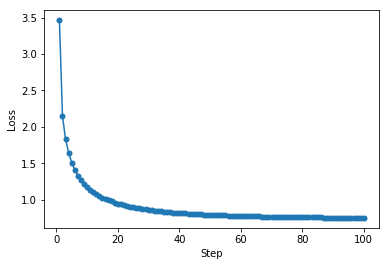

In [46]:
## Plot loss for logistic regression on train set with stochastic gradient descent in tensorflow

plot_loss(train_output['loss'], marker='o')

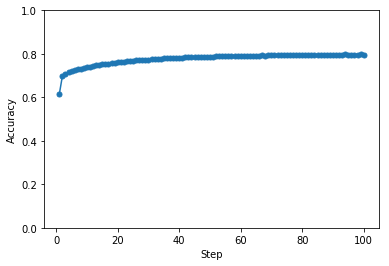

In [47]:
## Plot accuracy for logistic regression on train set with stochastic gradient descent in tensorflow

plot_accuracy(train_output['accuracy'], marker='o')

In [48]:
## Display number of samples per class in train set for logistic regression with stochastic gradient descent in tensorflow

train_tf_logreg_sgd_element_count_per_class = np.sum(train_output['nlabels_per_class'], axis=0)

train_tf_logreg_sgd_element_count_per_class

array([1585590, 1471691, 1712394, 1438690, 1648092, 1643494, 1750187,
       1120588, 1107395, 1656679])

In [49]:
## Count correct predictions per class in train set for logistic regression with stochastic gradient descent in TensorFlow

train_tf_logreg_sgd_pred_count_per_class = np.sum(train_output['npredictions_per_class'], axis=0)

train_tf_logreg_sgd_pred_count_per_class

array([1250741, 1099380, 1433220, 1127202, 1233647, 1368623, 1384880,
        805009,  695401, 1353471])

In [50]:
## Compute prediction accuracy per class in train set for logistic regression with stochastic gradient descent in TensorFlow

train_tf_logreg_sgd_pred_score_per_class = np.round(
    100*train_tf_logreg_sgd_pred_count_per_class/train_tf_logreg_sgd_element_count_per_class, 2
)

train_tf_logreg_sgd_pred_score_per_class

array([78.88, 74.7 , 83.7 , 78.35, 74.85, 83.28, 79.13, 71.84, 62.8 ,
       81.7 ])

In [51]:
## Run session to evaluate logistic regression model (trained with stochastic gradient descent in tensorflow) on test set

batchsize = test_dataset.shape[0]

# Set up dictionary feed
feed = {build['X']: test_dataset, build['y']: onehot_test_labels}

test_output = evaluate_classifier(
    session, saver, build, feed, batchsize, nclasses,
    monitor=monitor,
    sessiondir=os.path.join('log', 'session', 'logreg_sgd'),
    verbose=True
)

print('\nEvaluate logistic regression model (trained with stochastic gradient descent using tensorflow) on test set')

INFO:tensorflow:Restoring parameters from log/session/logreg_sgd
Evaluating model...
  Loss: 4.413E-01
  Accuracy: 0.882
  Accuracy per class: 0.887, 0.854, 0.928, 0.922, 0.855, 0.925, 0.876, 0.858, 0.750, 0.918
Model evaluation completed

Evaluate logistic regression model (trained with stochastic gradient descent using tensorflow) on test set


In [52]:
## Display number of samples per class in test set for logistic regression with stochastic gradient descent in tensorflow

test_tf_logreg_sgd_element_count_per_class = test_output['nlabels_per_class']

test_tf_logreg_sgd_element_count_per_class

array([961, 892, 966, 898, 977, 964, 982, 706, 687, 973])

In [53]:
## Count correct predictions per class in test set for logistic regression with stochastic gradient descent in tensorflow

test_tf_logreg_sgd_pred_count_per_class = test_output['npredictions_per_class']

test_tf_logreg_sgd_pred_count_per_class

array([852, 762, 896, 828, 835, 892, 860, 606, 515, 893])

In [54]:
## Compute prediction accuracy per class in test set for logistic regression with stochastic gradient descent in fensorflow

test_tf_logreg_sgd_pred_score_per_class = np.round(100*test_output['accuracy_per_class'], 2)

test_tf_logreg_sgd_pred_score_per_class

array([88.66, 85.43, 92.75, 92.2 , 85.47, 92.53, 87.58, 85.84, 74.96,
       91.78])

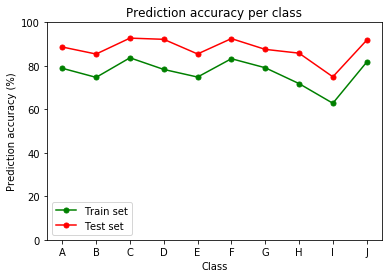

In [55]:
## Plot prediction accuracy per class in train and test set for logistic regression with stochastic gradient descent in tensorflow

plot_prediction_accuracy_per_class(
    [train_tf_logreg_sgd_pred_score_per_class, test_tf_logreg_sgd_pred_score_per_class], nclasses, 
    ('green', 'red'), ('Train set', 'Test set'), string.ascii_uppercase[:nclasses]
)

### Neural network with one hidden layer using tensorflow

In comparison to logistic regression, one linear fully connected layer and one activation layer are added before the linear fully connected layer already existent in the linear regression model.

The activation layer adds non-linearity to the classifier. Notice how such non-linearity increases the prediction accuracy in comparison to linear regression.

In [56]:
## Function for building a logistic regression model with one hidden layer in tensorflow

def build_logreg_model_with_hidden_layer(nw, nclasses, initw01, initb01, initw02, initb02, activation='relu', board=()):
    graph = tf.get_default_graph()
    
    with graph.as_default():
        with tf.name_scope('data'): # Input layer
            X = tf.placeholder(tf.float32, [None, nw]) # mnist data image of shape 28*28=784
            y = tf.placeholder(tf.float32, [None, nclasses]) # 0-9 digits recognition => 10 classes
        
        with tf.name_scope('fc_layer_01'): # Linear fully connected layer
            W01 = tf.Variable(initw01)
            b01 = tf.Variable(initb01)
            
            fc_layer_01 = tf.matmul(X, W01)+b01
        
        with tf.name_scope('act_layer_02'): # Activation layer
            if activation == 'relu':
                act_layer_02 = tf.nn.relu(fc_layer_01)
            elif activation == 'sigmoid':
                act_layer_02 = tf.sigmoid(fc_layer_01)
            elif activation == 'tanh':
                act_layer_02 = tf.tanh(fc_layer_01)
            else:
                raise ValueError('Wrong value passed to activation input argument')

        with tf.name_scope('outlayer'): # Linear fully connected layer
            W02 = tf.Variable(initw02)
            b02 = tf.Variable(initb02)
        
            outlayer = tf.matmul(act_layer_02, W02)+b02

        if 'histogram' in board:
            with tf.name_scope('summaries') as summaries_scope:
                tf.summary.histogram('weights01', W01)
                tf.summary.histogram('bias01', b01)
                tf.summary.histogram('weights02', W02)
                tf.summary.histogram('bias02', b02)
            
    build = {'graph': graph, 'X': X, 'y': y, 'outlayer': outlayer}
    
    if 'histogram' in board:
        build['summaries_scope'] = summaries_scope
    
    return build

In [57]:
## Reset default graph

tf.reset_default_graph()

In [58]:
## Build graph for logistic regression with one hidden layer on train set using tensorflow

ninterunits = 1024

# Initialize logistic regression parameters
initw01 = tf.truncated_normal([npixels, ninterunits])
initb01 = tf.zeros([ninterunits])
initw02 = tf.truncated_normal([ninterunits, nclasses])
initb02 = tf.zeros([nclasses])

# Specify what will be monitored and what will be stored in tensorboard
monitor = ('loss', 'accuracy', 'accuracy_per_class') # To select a single summary, say 'accuracy', set monitor = ('accuracy',)
board = ('loss', 'accuracy', 'histogram')

# Build graph
build = build_logreg_model_with_hidden_layer(npixels, nclasses, initw01, initb01, initw02, initb02, board=board)
build_classifier_graph(build, tf.train.GradientDescentOptimizer(0.1), activation='softmax_with_logits', monitor=monitor, board=board)

In [59]:
## Run session to train logistic regression with one hidden layer in tensorflow

ndata = train_dataset.shape[0]
batchsize = 157 # Stochastic gradient descent is run since batchsize < ndata

# Set up dictionary feed
feed = {build['X']: train_dataset[0:ndata, :], build['y']: onehot_train_labels[0:ndata]}

nepochs = 50 # Go through the training set 50 times
nbatches = ndata//batchsize # Calculate number of batches (per epoch)
multibatchsize = nbatches*batchsize # Stored monitored output every epoch

# Initialize session
session = tf.Session(graph=build['graph'])

# Initialize saver
saver = tf.train.Saver(max_to_keep=5)

with session.as_default():
    # Initialize saver
    saver = tf.train.Saver(max_to_keep=5)
    
    # Initialize variables
    session.run(tf.global_variables_initializer())
    
    start_time = time.process_time()
    train_output = train_classifier(
        session, build, feed, ndata, batchsize, nclasses, nepochs,
        saver=saver, save=True, monitor=monitor, board=board, multibatchsize=multibatchsize,
        permute=True, # Train set is permuted across epochs
        sessiondir=os.path.join('log', 'session', 'logreg_with_hidden_layer_sgd'),
        boarddir=os.path.join('log', 'board', 'logreg_with_hidden_layer_sgd'),
        verbose=True
    )
    end_time = time.process_time()
    tf_logreg_sgd_time = end_time-start_time

print('\nTrain logistic regression model with stochastic gradient descent using tensorflow')
print('Time ellapsed: %f seconds' % tf_logreg_sgd_time)

Multibach  1 of 50 with ending batch 964 of 964 in epoch  1 of 50
  Loss: 2.975E+01
  Accuracy: 0.750
  Accuracy per class: 0.772, 0.713, 0.795, 0.744, 0.739, 0.803, 0.761, 0.694, 0.618, 0.791
Multibach  2 of 50 with ending batch 964 of 964 in epoch  2 of 50
  Loss: 1.165E+01
  Accuracy: 0.798
  Accuracy per class: 0.816, 0.774, 0.828, 0.797, 0.799, 0.841, 0.803, 0.754, 0.677, 0.832
Multibach  3 of 50 with ending batch 964 of 964 in epoch  3 of 50
  Loss: 7.813E+00
  Accuracy: 0.811
  Accuracy per class: 0.827, 0.789, 0.843, 0.809, 0.813, 0.855, 0.821, 0.773, 0.686, 0.839
Multibach  4 of 50 with ending batch 964 of 964 in epoch  4 of 50
  Loss: 5.941E+00
  Accuracy: 0.819
  Accuracy per class: 0.835, 0.799, 0.847, 0.819, 0.818, 0.858, 0.826, 0.783, 0.704, 0.849
Multibach  5 of 50 with ending batch 964 of 964 in epoch  5 of 50
  Loss: 4.995E+00
  Accuracy: 0.822
  Accuracy per class: 0.838, 0.800, 0.851, 0.820, 0.823, 0.862, 0.829, 0.787, 0.709, 0.852
Multibach  6 of 50 with ending batc

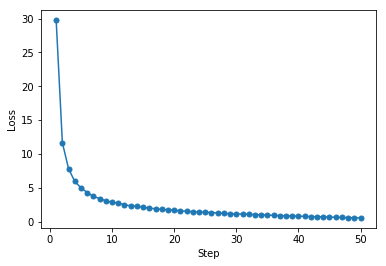

In [60]:
## Plot loss for logistic regression with one hidden layer on train set in tensorflow

plot_loss(train_output['loss'], marker='o')

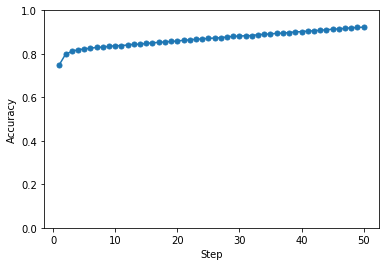

In [61]:
## Plot accuracy for logistic regression with one hidden layer on train set in tensorflow

plot_accuracy(train_output['accuracy'], marker='o')

In [62]:
## Display number of samples per class in train set for logistic regression with one hidden layer in tensorflow

train_tf_logreg_with_hidden_layer_sgd_element_count_per_class = np.sum(train_output['nlabels_per_class'], axis=0)

train_tf_logreg_with_hidden_layer_sgd_element_count_per_class

array([792795, 735844, 856194, 719345, 824047, 821743, 875093, 560296,
       553698, 828345])

In [63]:
## Count correct predictions per class in train set for logistic regression with one hidden layer in tensorflow

train_tf_logreg_with_hidden_layer_sgd_pred_count_per_class = np.sum(train_output['npredictions_per_class'], axis=0)

train_tf_logreg_with_hidden_layer_sgd_pred_count_per_class

array([698581, 632367, 757884, 627189, 715710, 736120, 763205, 474439,
       433185, 735530])

In [64]:
## Compute prediction accuracy per class in train set for logistic regression with one hidden layer in tensorflow

train_tf_logreg_with_hidden_layer_sgd_pred_score_per_class = np.round(
    100*train_tf_logreg_with_hidden_layer_sgd_pred_count_per_class/train_tf_logreg_with_hidden_layer_sgd_element_count_per_class, 2
)

train_tf_logreg_with_hidden_layer_sgd_pred_score_per_class

array([88.12, 85.94, 88.52, 87.19, 86.85, 89.58, 87.21, 84.68, 78.23,
       88.8 ])

In [65]:
## Run session to evaluate logistic regression with one hidden layer on test set in tensorflow

batchsize = test_dataset.shape[0]

# Set up dictionary feed
feed = {build['X']: test_dataset, build['y']: onehot_test_labels}

test_output = evaluate_classifier(
    session, saver, build, feed, batchsize, nclasses,
    monitor=monitor,
    sessiondir=os.path.join('log', 'session', 'logreg_with_hidden_layer_sgd'),
    verbose=True
)

print('\nEvaluate logistic regression with one hidden layer on test set')

INFO:tensorflow:Restoring parameters from log/session/logreg_with_hidden_layer_sgd
Evaluating model...
  Loss: 1.360E+00
  Accuracy: 0.910
  Accuracy per class: 0.917, 0.895, 0.901, 0.932, 0.902, 0.936, 0.935, 0.909, 0.822, 0.926
Model evaluation completed

Evaluate logistic regression with one hidden layer on test set


In [66]:
## Display number of samples per class in test set for logistic regression with stochastic gradient descent in tensorflow

test_tf_logreg_with_hidden_layer_sgd_element_count_per_class = test_output['nlabels_per_class']

test_tf_logreg_with_hidden_layer_sgd_element_count_per_class

array([961, 892, 966, 898, 977, 964, 982, 706, 687, 973])

In [67]:
## Count correct predictions per class in test set for logistic regression with stochastic gradient descent in tensorflow

test_tf_logreg_with_hidden_layer_sgd_pred_count_per_class = test_output['npredictions_per_class']

test_tf_logreg_with_hidden_layer_sgd_pred_count_per_class

array([881, 798, 870, 837, 881, 902, 918, 642, 565, 901])

In [68]:
## Compute prediction accuracy per class in test set for logistic regression with stochastic gradient descent in fensorflow

test_tf_logreg_with_hidden_layer_sgd_pred_score_per_class = np.round(100*test_output['accuracy_per_class'], 2)

test_tf_logreg_with_hidden_layer_sgd_pred_score_per_class

array([91.68, 89.46, 90.06, 93.21, 90.17, 93.57, 93.48, 90.93, 82.24,
       92.6 ])

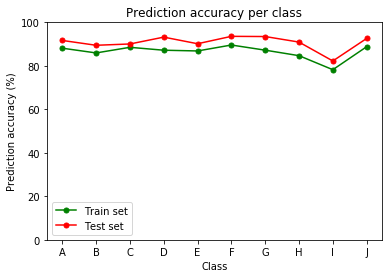

In [69]:
## Plot prediction accuracy per class in train and test set for logistic regression with stochastic gradient descent in tensorflow

plot_prediction_accuracy_per_class(
    [train_tf_logreg_with_hidden_layer_sgd_pred_score_per_class, test_tf_logreg_with_hidden_layer_sgd_pred_score_per_class], nclasses, 
    ('green', 'red'), ('Train set', 'Test set'), string.ascii_uppercase[:nclasses]
)